<!-- <a href="https://colab.research.google.com/github/daphnecor/intro-to-rl/blob/main/Chapter_4_Dynamic_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> -->

In [23]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import poisson
from typing import Tuple

sns.set('notebook', font_scale=1.1, rc={'figure.figsize': (6, 6)})
sns.set_style('ticks', rc={'figure.facecolor': 'none', 'axes.facecolor': 'none'})
%config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['figure.facecolor'] = 'white'

### 4.1 Policy Evaluation

Let's reproduce Figure 4.1 from the book (page 77). We want to implement policy iteration and show that the policy converges to the optimal policy -- satisfying the Bellman optimality equations -- within a finite number of steps. ($v_{k} \to v_\pi$ as $k \to \infty$).

We follow the in-place iterative policy evaluation algorithm on page 75.


In [20]:
'''
Setup and initialization
'''
# Create a simple grid world
N_ROWS = 4
N_COLS = 4

# Left, right, up, down
ACTIONS = (
    np.array([0, -1]),
    np.array([0, 1]),
    np.array([1, 0]),
    np.array([-1, 0]),
)

# Use a random policy; all actions are equally likely
PI_RAND = 1 / len(ACTIONS)

# Parameters
TERMINATE = False
THETA = 1e-2
iters = 0
GAMMA = 1

In [21]:
'''
Helper functions
'''

def is_terminal(state: np.array) -> bool:
    '''
    Assume that upper left and bottom right are terminal states. 
    
    Args:
        state: the (x, y) coordinates of the grid world.
    Return:
        Whether the state is a terminal state (True) or not (False).
    '''
    x, y = state
    if (x == 0 and y == 0) or (x == N_ROWS-1 and y == N_COLS-1): 
        return True
    else:
        return False
    
def step(state: np.array, action: int) -> Tuple[np.array, int]:
    '''
    Take a step in the small grid world.

    Args:
        state: the (x, y) coordinates; current position of the agent.
        action: the selected action.
    Returns:
        next_state: the position of the agent after taking the action in the state.
        reward: the reward signal optained.
    '''
    # Check if the agent is in a terminal state
    if is_terminal(state):
        return (
            state, 0
        )
    
    # Take action
    next_state = state + action

    # make sure we stay inside our grid world
    x, y = next_state
    if x < 0 or (x > N_ROWS-1) or y < 0 or (y > N_COLS-1):
        next_state = state     
    reward = -1

    return next_state, reward

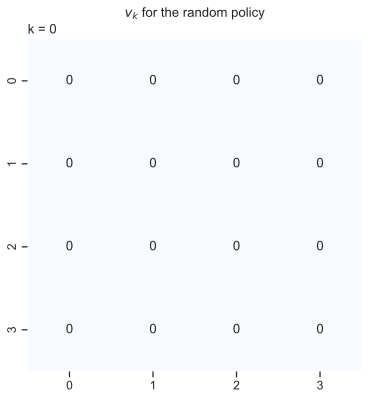

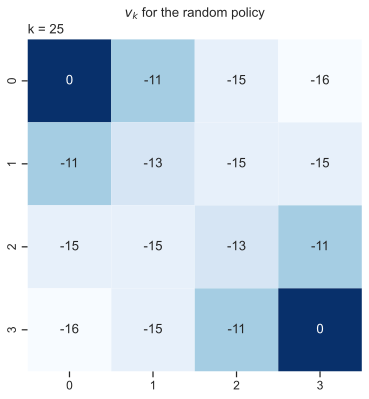

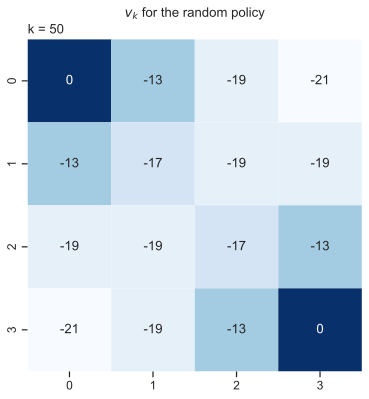

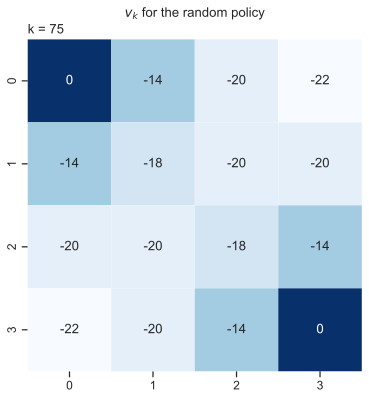

In [22]:
'''
Policy evaluation algorithm
'''

# Create grid to track the value of each state
new_state_values = np.zeros((N_ROWS, N_COLS))

while not TERMINATE:
    
    # Current is new and previous is old
    state_values = new_state_values.copy()
    old_state_values = state_values.copy()

    # Loop for each state s 
    for row_i in range(N_ROWS):
        for col_i in range(N_COLS):
            state_value = 0 
            for action in ACTIONS:
                state = np.array([row_i, col_i])

                next_state, reward = step(state, action)

                # Add reward to state value
                state_value += PI_RAND * (reward + GAMMA * state_values[next_state[0], next_state[1]])

            # Update state value after we've gone through each action
            new_state_values[row_i, col_i] = state_value

    # Show approximation of the state-value function
    if iters % 25 == 0:
        sns.heatmap(state_values, annot=True, cbar=False, cmap='Blues')
        plt.title(f'k = {iters}', loc='left')
        plt.title(r'$v_k$ for the random policy', y=1.05)
        plt.show();
        print('')

    iters += 1

    # Check termination condition 
    DELTA = abs(old_state_values - new_state_values).max()
    if DELTA < THETA:
        TERMINATE = True